In [1]:
from sympy import Matrix, init_printing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
init_printing()

# Defining Matricies with Sympy

In [2]:
A = Matrix([[1,2,3],[4,5,6],[7,8,9]])
x = Matrix([1,2,3])
A, x

⎛⎡1  2  3⎤  ⎡1⎤⎞
⎜⎢       ⎥  ⎢ ⎥⎟
⎜⎢4  5  6⎥, ⎢2⎥⎟
⎜⎢       ⎥  ⎢ ⎥⎟
⎝⎣7  8  9⎦  ⎣3⎦⎠

# Defining Matricies with NumPy

In [3]:
A_np = np.array(A, dtype=float) # "array" is used by NumPy to create matrices
x_np = np.array([1, 2, 3], dtype=float)
A_np, x_np

(array([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]]),
 array([1., 2., 3.]))

In [4]:
A*x

⎡14⎤
⎢  ⎥
⎢32⎥
⎢  ⎥
⎣50⎦

In [5]:
A_np @ x_np

array([14., 32., 50.])

In [6]:
A + 2

TypeError: cannot add <class 'sympy.matrices.dense.MutableDenseMatrix'> and <class 'int'>

In [7]:
A_np + 2

array([[ 3.,  4.,  5.],
       [ 6.,  7.,  8.],
       [ 9., 10., 11.]])

In [8]:
A.T, A_np.T

(Matrix([
 [1, 4, 7],
 [2, 5, 8],
 [3, 6, 9]]),
 array([[1., 4., 7.],
        [2., 5., 8.],
        [3., 6., 9.]]))

In [9]:
A_np.shape, x_np.shape

In [10]:
x_np @ x_np, x_np.dot(x_np)

The both expressions are the dot products of two vectors. ``` x_np @ x_np``` performs matrix multiplication.

In [11]:
A_np.dot(x_np)

array([14., 32., 50.])

This one returns dot product of the for each row

In [12]:
x_np @ A_np

array([30., 36., 42.])

This returns dot product of the columns and the vector

In [13]:
A_np * x_np, x_np * A_np

(array([[ 1.,  4.,  9.],
        [ 4., 10., 18.],
        [ 7., 16., 27.]]),
 array([[ 1.,  4.,  9.],
        [ 4., 10., 18.],
        [ 7., 16., 27.]]))

multiplies each element in a row with the corresponding element of the vector

In [14]:
u = x / x.norm()
u*u.T # Creates a mapping matrix for the space spanned by the x vector
_.evalf()

AttributeError: 'tuple' object has no attribute 'evalf'

In [15]:
u_np = x_np / np.linalg.norm(x_np)
u_np @ u_np.T # Returns a dot product <u_np,u_np> as NumPy doesn't distinguish between orientation of the vector
u_npT = np.array(x, dtype='float')/np.linalg.norm(x_np)
print(u_np, u_npT)
u_np * u_npT   # the possible solution with NumPy
u_np * u_np.reshape(3,1)     # also possible solution

[0.26726124 0.53452248 0.80178373] [[0.26726124]
 [0.53452248]
 [0.80178373]]


array([[0.07142857, 0.14285714, 0.21428571],
       [0.14285714, 0.28571429, 0.42857143],
       [0.21428571, 0.42857143, 0.64285714]])

# Import of Data Sets and Visualizations

In [16]:
data = np.genfromtxt('weight-height.csv', delimiter=',', 
                     dtype=[('Gender','U10'), ('Height',float), ('Weight',float)], names=True)
gender = data['Gender']
height = data['Height']
weight = data['Weight']

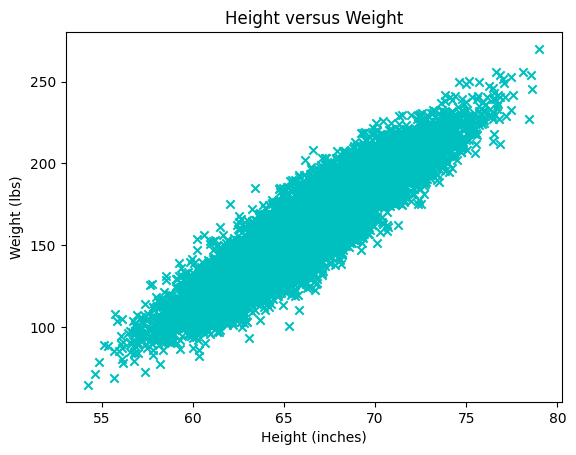

In [17]:
plt.scatter(x=height, y=weight, color='c', marker='x')
plt.title("Height versus Weight")
plt.xlabel("Height (inches)")
plt.ylabel("Weight (lbs)")
plt.plot() 

The plot above corresponds to the sample correlation, that is the degree of linear relation between weight and height. The center of this "cloud" lays at the mean values coordinates

In [18]:
X = np.array([height, weight]).T
X

array([[ 73.84701702, 241.89356318],
       [ 68.78190405, 162.31047252],
       [ 74.11010539, 212.74085556],
       ...,
       [ 63.86799221, 128.47531878],
       [ 69.03424313, 163.85246135],
       [ 61.94424588, 113.64910268]])

The X has the first column as the height values and the second column as the weight values

In [19]:
def average_of_each_column(X):
    return np.array([X[:,0].mean(), X[:,1].mean()])

In [20]:
def standardize(X):
    return X - average_of_each_column(X) # 'broadcasting' the vector as we saw above

X_st = standardize(X)
X_st

array([[  7.47945726,  80.45320635],
       [  2.41434429,   0.87011569],
       [  7.74254564,  51.30049872],
       ...,
       [ -2.49956754, -32.96503805],
       [  2.66668338,   2.41210451],
       [ -4.42331388, -47.79125416]])

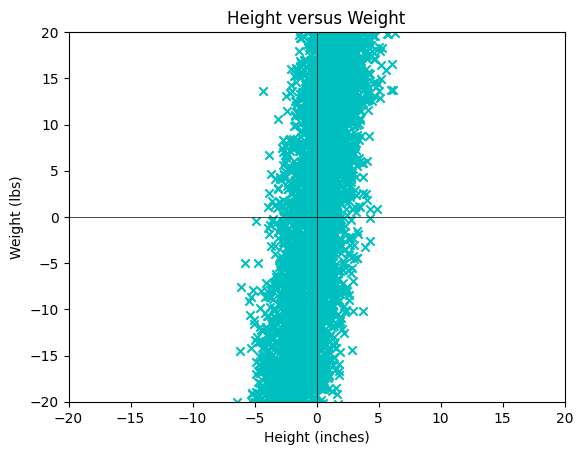

In [21]:
plt.scatter(X_st[:,0], X_st[:,1], color='c', marker='x')
plt.title("Height versus Weight")
plt.xlabel("Height (inches)")
plt.ylabel("Weight (lbs)")
plt.xlim(-20, 20)
plt.ylim(-20, 20)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

# Covariance matrix

In [22]:
C = 1/(X_st.shape[0]-1) * X_st.T @ X_st #sample covariance 
C  # C is a symmetric matrix with a diagonal C_00 height variance, C_11 weight variance, C_01 = C_10 sample covariance

array([[  14.80347264,  114.24265645],
       [ 114.24265645, 1030.95185544]])

\begin{equation}
    \frac{1}{N-1}
    \begin{bmatrix} 
    \overline{x} - x_1 & \overline{x} - x_2 \\
    \overline{y} - y_1 & \overline{y} - y_2
    \end{bmatrix} \cdot
    \begin{bmatrix} 
    \overline{x} - x_1 & \overline{y} - y_1 \\
    \overline{x} - x_2 & \overline{y} - y_2
    \end{bmatrix} = \frac{1}{N-1}
    \begin{bmatrix}
    (\overline{x} - x_1)^2 + (\overline{x} - x_2)^2 & (\overline{x} - x_1)(\overline{x} - x_2) + (\overline{y} - y_1)(\overline{y} - y_2) \\
    (\overline{x} - x_1)(\overline{x} - x_2) + (\overline{y} - y_1)(\overline{y} - y_2) & (\overline{y} - y_1)^2 + (\overline{y} - y_2)^2
    \end{bmatrix}
\end{equation}


In [23]:
lamda, Q = np.linalg.eig(C)
lamda, Q

(array([   2.11786479, 1043.63746329]),
 array([[-0.99389139, -0.1103626 ],
        [ 0.1103626 , -0.99389139]]))

In [24]:
Q[:,0] @ Q[:,1]

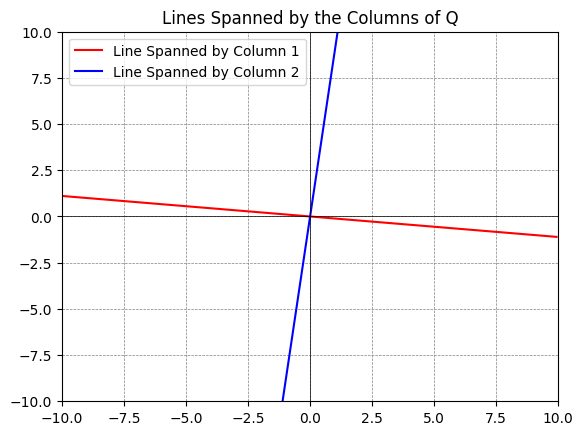

In [25]:
q1 = Q[:,0] # the first column
q2 = Q[:,1] # the second column

# Define a range for t, which will be used to extend the lines
t = np.linspace(-10, 10, 2)

# Plotting
fig, ax = plt.subplots()
# For each vector, plot a line that it spans
ax.plot(t*q1[0], t*q1[1], 'r', label='Line Spanned by Column 1')
ax.plot(t*q2[0], t*q2[1], 'b', label='Line Spanned by Column 2')

# Adjust the plot limits and style
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.title('Lines Spanned by the Columns of Q')

# Display the plot
plt.show()

In [26]:
P = np.array(Q[:,1]).reshape(2,1) * np.array(Q[:,1])
X_stp = X_st @ P
P

array([[0.0121799 , 0.10968844],
       [0.10968844, 0.9878201 ]])

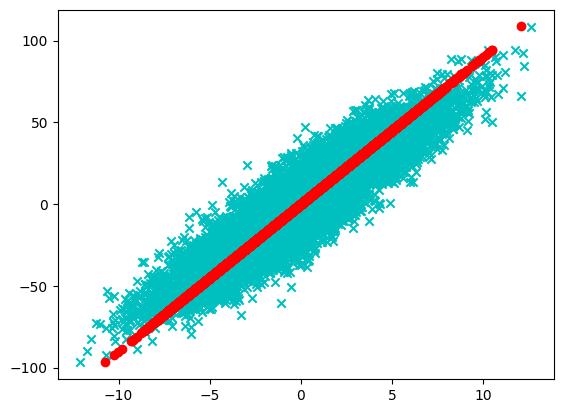

In [27]:
plt.scatter(X_st[:,0], X_st[:,1], color='c', marker='x')
plt.scatter(X_stp[:,0], X_stp[:,1], color='r', marker='o')

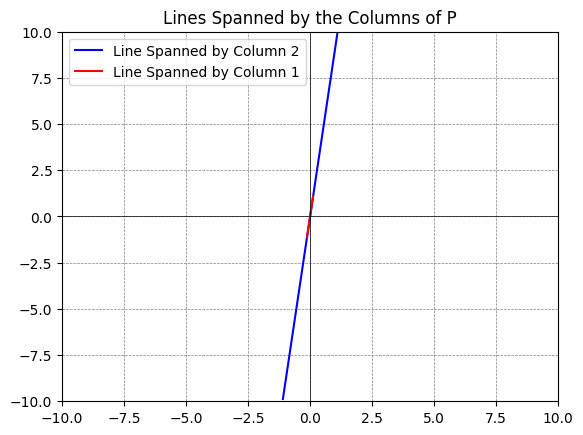

[-1.09688437  1.09688437] [-9.87820097  9.87820097]


In [28]:
p1 = P[:,0] # the first column
p2 = P[:,1] # the second column
# Define a range for t, which will be used to extend the lines
t = np.linspace(-10, 10, 2)

# Plotting
fig, ax = plt.subplots()
# For each vector, plot a line that it spans
ax.plot(t*p2[0], t*p2[1], 'b', label='Line Spanned by Column 2')
ax.plot(t*p1[0], t*p1[1], 'r', label='Line Spanned by Column 1')

# Adjust the plot limits and style
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.title('Lines Spanned by the Columns of P')

plt.show()
print(t*p2[0], t*p2[1])

In [31]:
# Function to generate a synthetic dataset
def generate_3d_data(eigenvalues, size=1000, dim=3):
    # Eigenvalues specified by the user
    assert len(eigenvalues) == dim, "There must be exactly dim eigenvalues."
    
    # Create a diagonal matrix for the eigenvalues
    Lambda = np.diag(eigenvalues)
    
    # Generate a random orthogonal matrix (eigenvectors)
    Q, _ = np.linalg.qr(np.random.randn(dim, dim))
    
    # Generate random data from a standard normal distribution
    data_standard_normal = np.random.randn(size, dim)
    
    # Transform the data using the square root of the covariance matrix
    data_transformed = data_standard_normal @ np.sqrt(Lambda) @ Q.T
        
    # Construct the covariance matrix
    Cov = 1/(size-1) * data_transformed.T @ data_transformed
     
    return data_transformed, Cov

# Eigenvalues you want for your covariance matrix
eigenvalues = [1, 1, 0.04]

# Generate the data
Y, C = generate_3d_data(eigenvalues)
Q, C

(array([[-0.99389139, -0.1103626 ],
        [ 0.1103626 , -0.99389139]]),
 array([[ 0.70439243, -0.02997722, -0.44949629],
        [-0.02997722,  1.01452572, -0.08540992],
        [-0.44949629, -0.08540992,  0.35909475]]))

The eigenvectors in the `Q` matrix don't directly refer to the eigenvalues in the `Lambda` matrix. Instead, they are used together to define the covariance structure of the generated data.

In the context of this function, the `Q` matrix is a random orthogonal matrix, meaning its columns are orthogonal (perpendicular) and each have a length of 1. This matrix is used to rotate the data, which is a common step when you want to change the covariance structure of a dataset.

The `Lambda` matrix, on the other hand, is a diagonal matrix where the diagonal elements are the square roots of the eigenvalues. These eigenvalues represent the variances of your variables. When you multiply your data by the square root of the `Lambda` matrix, you're scaling each variable by its standard deviation.

So, in summary, the `Q` matrix rotates your data and the `Lambda` matrix scales your data. When used together in the transformation `data_standard_normal @ np.sqrt(Lambda) @ Q.T`, they generate data that has a specific covariance structure defined by the `Lambda` and `Q` matrices.


You're correct in your understanding of the covariance between two variables. The covariance is calculated as you described: $$\frac{1}{n-1}\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})$$ where $\bar{x}$ and $\bar{y}$ are the means of the variables $x$ and $y$, respectively.
In the context of your function, the data is generated from a standard normal distribution, which has a mean of 0. So, in this case, $\bar{x}$ and $\bar{y}$ are both 0, and the formula simplifies to $$\frac{1}{n-1}\sum_{i=1}^{n}x_iy_i$$
The covariance matrix is a generalization of this concept to multiple dimensions. Each entry in the covariance matrix is the covariance between two of the variables. So, if you have a dataset with $d$ dimensions, the covariance matrix is a $d \times d$ matrix where the entry in the $i$th row and $j$th column is the covariance between the $i$th variable and the $j$th variable.
In the function you provided, the covariance matrix is calculated as data_transformed.T @ data_transformed / (size - 1). This operation calculates the covariance between each pair of variables in the transformed data. The division by size - 1 is a normalization factor that is commonly used in statistics when estimating the covariance from a sample.

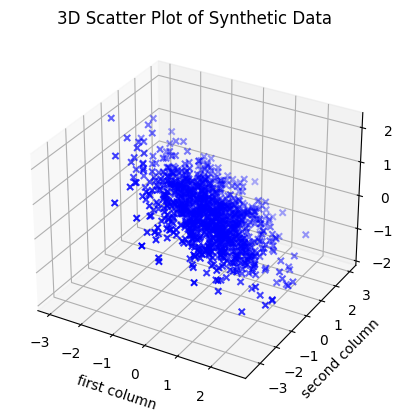

In [32]:
# %matplotlib qt   # plotted in a new window which can be rotated (remove #)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Y[:,0], Y[:,1], Y[:,2], c='b', marker='x')
ax.set_xlabel('first column') 
ax.set_ylabel('second column')
ax.set_zlabel('third column')
plt.title('3D Scatter Plot of Synthetic Data')
plt.show()